In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchvision.models import alexnet
from livelossplot import PlotLosses

In [2]:
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

mean = torch.zeros(3)
std = torch.zeros(3)
for images, _ in train_loader:
    num_images = images.size(0)
    images = images.view(num_images, images.size(1), -1)
    mean = images.mean(dim=(0, 2))
    std = images.std(dim=(0, 2))
mean = mean.tolist()
std = std.tolist()

print("Mean of the dataset:", mean)
print("Standard deviation of the dataset:", std)

Files already downloaded and verified
Mean of the dataset: [0.491400808095932, 0.48215898871421814, 0.44653093814849854]
Standard deviation of the dataset: [0.24703224003314972, 0.24348513782024384, 0.26158785820007324]


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


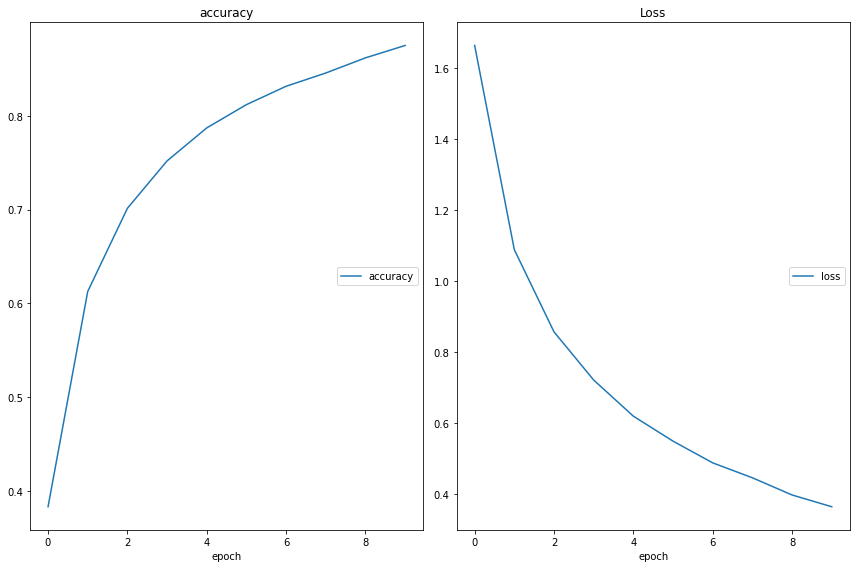

accuracy
	accuracy         	 (min:    0.383, max:    0.875, cur:    0.875)
Loss
	loss             	 (min:    0.364, max:    1.664, cur:    0.364)


In [8]:
model = alexnet(num_classes=10).to(device)

#Use cross entropy as loss function
criterion = nn.CrossEntropyLoss()
#Use Stochastic Gradient Descent as optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

liveloss = PlotLosses()

num_epochs = 10
for epoch in range(num_epochs):
    logs = {}
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_accuracy = running_corrects.item() / total

    logs['loss'] = epoch_loss
    logs['accuracy'] = epoch_accuracy

    liveloss.update(logs)
    liveloss.send()

In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('AlexNet test accuracy: %d %%' % (100 * correct / total))

AlexNet test accuracy: 78 %


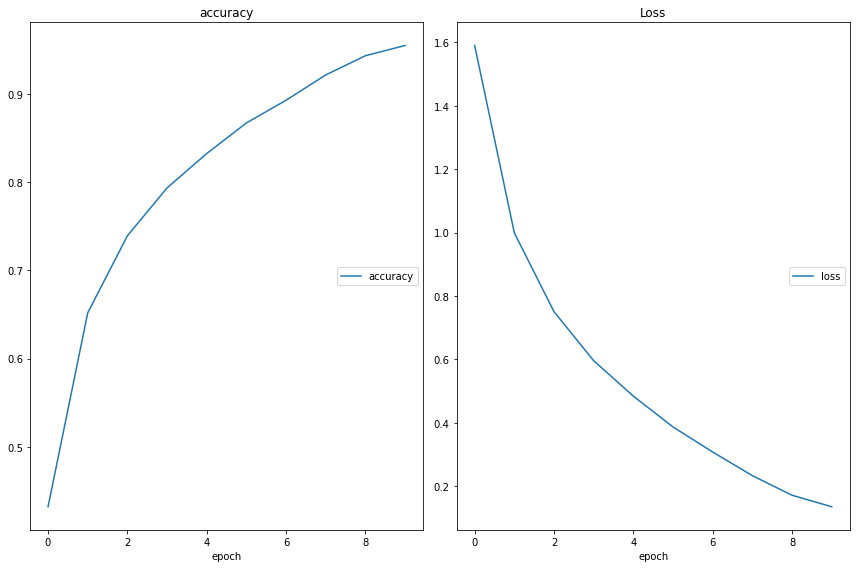

accuracy
	accuracy         	 (min:    0.432, max:    0.955, cur:    0.955)
Loss
	loss             	 (min:    0.135, max:    1.590, cur:    0.135)


In [18]:
model = models.resnet18(num_classes=10).to(device)

#Use cross entropy as loss function
criterion = nn.CrossEntropyLoss()
#Use Stochastic Gradient Descent as optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

liveloss = PlotLosses()

num_epochs = 10
for epoch in range(num_epochs):
    logs = {}
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_accuracy = running_corrects.item() / total

    logs['loss'] = epoch_loss
    logs['accuracy'] = epoch_accuracy

    liveloss.update(logs)
    liveloss.send()

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('ResNet18 test accuracy: %d %%' % (100 * correct / total))

ResNet18 test accuracy: 81 %


In [20]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [55]:
class myCNN(nn.Module):
    def __init__(self, num_blocks, input_size, hidden_size, output_size):
        super(myCNN, self).__init__()
        
        self.conv = nn.Conv2d(input_size, hidden_size, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        blocks = [nn.Sequential(
            nn.Conv2d(hidden_size, hidden_size, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) for i in range(num_blocks-1)]
        self.blocks = nn.Sequential(*blocks)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.blocks(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x

In [70]:
max_block = 5 #Define max blocks number

for i in range(max_block):
    cur_block_num = i+1 #starts from 1
    
    model = myCNN(num_blocks=cur_block_num, input_size=3, hidden_size=32, output_size=10).to(device)

    #Use cross entropy as loss function
    criterion = nn.CrossEntropyLoss()
    #Use Stochastic Gradient Descent as optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    num_epochs = 10
    
    for epoch in range(num_epochs):
        logs = {}
        running_loss = 0.0
        running_corrects = 0
        total = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
        
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * images.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_accuracy = running_corrects.item() / total

        print('[block: {}, epoch: {}] epoch_loss: {:.3f} epoch_accuracy: {:.3f}'.format(cur_block_num, epoch, epoch_loss, epoch_accuracy))

[block: 1, epoch: 0] epoch_loss: 2.013 epoch_accuracy: 0.259
[block: 1, epoch: 1] epoch_loss: 1.809 epoch_accuracy: 0.325
[block: 1, epoch: 2] epoch_loss: 1.746 epoch_accuracy: 0.347
[block: 1, epoch: 3] epoch_loss: 1.709 epoch_accuracy: 0.368
[block: 1, epoch: 4] epoch_loss: 1.669 epoch_accuracy: 0.391
[block: 1, epoch: 5] epoch_loss: 1.631 epoch_accuracy: 0.412
[block: 1, epoch: 6] epoch_loss: 1.600 epoch_accuracy: 0.426
[block: 1, epoch: 7] epoch_loss: 1.577 epoch_accuracy: 0.436
[block: 1, epoch: 8] epoch_loss: 1.561 epoch_accuracy: 0.446
[block: 1, epoch: 9] epoch_loss: 1.546 epoch_accuracy: 0.452
[block: 2, epoch: 0] epoch_loss: 1.832 epoch_accuracy: 0.315
[block: 2, epoch: 1] epoch_loss: 1.581 epoch_accuracy: 0.423
[block: 2, epoch: 2] epoch_loss: 1.451 epoch_accuracy: 0.477
[block: 2, epoch: 3] epoch_loss: 1.366 epoch_accuracy: 0.513
[block: 2, epoch: 4] epoch_loss: 1.301 epoch_accuracy: 0.536
[block: 2, epoch: 5] epoch_loss: 1.254 epoch_accuracy: 0.555
[block: 2, epoch: 6] epo

In [84]:
import copy

In [110]:
cur_block_num = 4 #Using block number = 4
    
model = myCNN(num_blocks=cur_block_num, input_size=3, hidden_size=32, output_size=10).to(device)

#Use cross entropy as loss function
criterion = nn.CrossEntropyLoss()
#Use Stochastic Gradient Descent as optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20
    
for epoch in range(num_epochs):
    logs = {}
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_accuracy = running_corrects.item() / total

    print('[block: {}, epoch: {}] epoch_loss: {:.3f} epoch_accuracy: {:.3f}'.format(cur_block_num, epoch, epoch_loss, epoch_accuracy))
    
    if epoch == 9:
        myCNN_10epoch = copy.deepcopy(model)

myCNN_20epoch = copy.deepcopy(model)

[block: 4, epoch: 0] epoch_loss: 1.676 epoch_accuracy: 0.379
[block: 4, epoch: 1] epoch_loss: 1.193 epoch_accuracy: 0.570
[block: 4, epoch: 2] epoch_loss: 1.004 epoch_accuracy: 0.646
[block: 4, epoch: 3] epoch_loss: 0.903 epoch_accuracy: 0.681
[block: 4, epoch: 4] epoch_loss: 0.835 epoch_accuracy: 0.705
[block: 4, epoch: 5] epoch_loss: 0.792 epoch_accuracy: 0.722
[block: 4, epoch: 6] epoch_loss: 0.751 epoch_accuracy: 0.737
[block: 4, epoch: 7] epoch_loss: 0.720 epoch_accuracy: 0.747
[block: 4, epoch: 8] epoch_loss: 0.694 epoch_accuracy: 0.757
[block: 4, epoch: 9] epoch_loss: 0.674 epoch_accuracy: 0.765
[block: 4, epoch: 10] epoch_loss: 0.654 epoch_accuracy: 0.771
[block: 4, epoch: 11] epoch_loss: 0.639 epoch_accuracy: 0.777
[block: 4, epoch: 12] epoch_loss: 0.622 epoch_accuracy: 0.781
[block: 4, epoch: 13] epoch_loss: 0.610 epoch_accuracy: 0.785
[block: 4, epoch: 14] epoch_loss: 0.603 epoch_accuracy: 0.788
[block: 4, epoch: 15] epoch_loss: 0.587 epoch_accuracy: 0.793
[block: 4, epoch: 

In [111]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = myCNN_10epoch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('myCNN[4 blocks, 10 epoch] test accuracy: %d %%' % (100 * correct / total))

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = myCNN_20epoch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('myCNN[4 blocks, 20 epoch] test accuracy: %d %%' % (100 * correct / total))

myCNN[4 blocks, 10 epoch] test accuracy: 71 %
myCNN[4 blocks, 20 epoch] test accuracy: 72 %


In [87]:
class myCNN_improved(nn.Module):
    def __init__(self, num_blocks, input_size, hidden_size, output_size):
        super(myCNN_improved, self).__init__()
        
        self.conv = nn.Conv2d(input_size, hidden_size, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        blocks = [nn.Sequential(
            nn.Conv2d(hidden_size, hidden_size, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(hidden_size, hidden_size, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) for i in range(num_blocks-1)]
        self.blocks = nn.Sequential(*blocks)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.blocks(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x

In [88]:
cur_block_num = 4 #Using block number = 4
    
model = myCNN_improved(num_blocks=cur_block_num, input_size=3, hidden_size=32, output_size=10).to(device)

#Use cross entropy as loss function
criterion = nn.CrossEntropyLoss()
#Use Stochastic Gradient Descent as optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20
    
for epoch in range(num_epochs):
    logs = {}
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_accuracy = running_corrects.item() / total

    print('[block: {}, epoch: {}] epoch_loss: {:.3f} epoch_accuracy: {:.3f}'.format(cur_block_num, epoch, epoch_loss, epoch_accuracy))
    
    if epoch == 9:
        myCNN_improved_10epoch = copy.deepcopy(model)

myCNN_improved_20epoch = copy.deepcopy(model)

[block: 4, epoch: 0] epoch_loss: 1.796 epoch_accuracy: 0.321
[block: 4, epoch: 1] epoch_loss: 1.275 epoch_accuracy: 0.538
[block: 4, epoch: 2] epoch_loss: 1.075 epoch_accuracy: 0.623
[block: 4, epoch: 3] epoch_loss: 0.983 epoch_accuracy: 0.657
[block: 4, epoch: 4] epoch_loss: 0.935 epoch_accuracy: 0.676
[block: 4, epoch: 5] epoch_loss: 0.904 epoch_accuracy: 0.685
[block: 4, epoch: 6] epoch_loss: 0.872 epoch_accuracy: 0.699
[block: 4, epoch: 7] epoch_loss: 0.854 epoch_accuracy: 0.708
[block: 4, epoch: 8] epoch_loss: 0.842 epoch_accuracy: 0.713
[block: 4, epoch: 9] epoch_loss: 0.830 epoch_accuracy: 0.719
[block: 4, epoch: 10] epoch_loss: 0.825 epoch_accuracy: 0.722
[block: 4, epoch: 11] epoch_loss: 0.810 epoch_accuracy: 0.727
[block: 4, epoch: 12] epoch_loss: 0.807 epoch_accuracy: 0.728
[block: 4, epoch: 13] epoch_loss: 0.795 epoch_accuracy: 0.733
[block: 4, epoch: 14] epoch_loss: 0.796 epoch_accuracy: 0.734
[block: 4, epoch: 15] epoch_loss: 0.788 epoch_accuracy: 0.736
[block: 4, epoch: 

In [89]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = myCNN_improved_10epoch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('myCNN_improved[4 blocks, 10 epoch] test accuracy: %d %%' % (100 * correct / total))

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = myCNN_improved_20epoch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('myCNN_improved[4 blocks, 20 epoch] test accuracy: %d %%' % (100 * correct / total))

myCNN_improved[4 blocks, 10 epoch] test accuracy: 69 %
myCNN_improved[4 blocks, 20 epoch] test accuracy: 69 %


In [103]:
class ResidualBlock(nn.Module):
    def __init__(self, input_size, output_size, stride=1):
        super(ResidualBlock, self).__init__()

        self.conv1 = nn.Conv2d(input_size, output_size, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(output_size)
        self.relu = nn.ReLU()
        
        self.conv2 = nn.Conv2d(output_size, output_size, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(output_size)

        self.shortcut = nn.Sequential()
        if stride != 1 or input_size != output_size:
            self.shortcut = nn.Sequential(
                nn.Conv2d(input_size, output_size, kernel_size=1, stride=stride),
                nn.BatchNorm2d(output_size)
            )

    def forward(self, x):
        identity = x

        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        identity = self.shortcut(identity)

        out += identity
        out = self.relu(out)

        return out

In [104]:
class myResNet(nn.Module):
    def __init__(self, num_blocks, input_size, hidden_size, output_size):
        super(myResNet, self).__init__()
        
        self.conv = nn.Conv2d(input_size, hidden_size, kernel_size=3, stride=1, padding=1)
        self.bn = nn.BatchNorm2d(hidden_size)
        self.relu = nn.ReLU()
        
        self.blocks = nn.Sequential(
            *[ResidualBlock(hidden_size, hidden_size) for _ in range(num_blocks)]
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.blocks(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

In [105]:
max_block = 5 #Define max blocks number

for i in range(max_block):
    cur_block_num = i+1 #starts from 1
    
    model = myResNet(num_blocks=cur_block_num, input_size=3, hidden_size=32, output_size=10).to(device)

    #Use cross entropy as loss function
    criterion = nn.CrossEntropyLoss()
    #Use Stochastic Gradient Descent as optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    num_epochs = 10
    
    for epoch in range(num_epochs):
        logs = {}
        running_loss = 0.0
        running_corrects = 0
        total = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
        
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * images.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_accuracy = running_corrects.item() / total

        print('[block: {}, epoch: {}] epoch_loss: {:.3f} epoch_accuracy: {:.3f}'.format(cur_block_num, epoch, epoch_loss, epoch_accuracy))

[block: 1, epoch: 0] epoch_loss: 1.859 epoch_accuracy: 0.307
[block: 1, epoch: 1] epoch_loss: 1.637 epoch_accuracy: 0.409
[block: 1, epoch: 2] epoch_loss: 1.517 epoch_accuracy: 0.457
[block: 1, epoch: 3] epoch_loss: 1.446 epoch_accuracy: 0.485
[block: 1, epoch: 4] epoch_loss: 1.388 epoch_accuracy: 0.508
[block: 1, epoch: 5] epoch_loss: 1.337 epoch_accuracy: 0.528
[block: 1, epoch: 6] epoch_loss: 1.293 epoch_accuracy: 0.543
[block: 1, epoch: 7] epoch_loss: 1.257 epoch_accuracy: 0.557
[block: 1, epoch: 8] epoch_loss: 1.227 epoch_accuracy: 0.569
[block: 1, epoch: 9] epoch_loss: 1.200 epoch_accuracy: 0.576
[block: 2, epoch: 0] epoch_loss: 1.762 epoch_accuracy: 0.352
[block: 2, epoch: 1] epoch_loss: 1.476 epoch_accuracy: 0.474
[block: 2, epoch: 2] epoch_loss: 1.329 epoch_accuracy: 0.528
[block: 2, epoch: 3] epoch_loss: 1.228 epoch_accuracy: 0.564
[block: 2, epoch: 4] epoch_loss: 1.167 epoch_accuracy: 0.587
[block: 2, epoch: 5] epoch_loss: 1.112 epoch_accuracy: 0.610
[block: 2, epoch: 6] epo

In [106]:
cur_block_num = 5 #Using block number = 5
    
model = myResNet(num_blocks=cur_block_num, input_size=3, hidden_size=32, output_size=10).to(device)

#Use cross entropy as loss function
criterion = nn.CrossEntropyLoss()
#Use Stochastic Gradient Descent as optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20
    
for epoch in range(num_epochs):
    logs = {}
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_accuracy = running_corrects.item() / total

    print('[block: {}, epoch: {}] epoch_loss: {:.3f} epoch_accuracy: {:.3f}'.format(cur_block_num, epoch, epoch_loss, epoch_accuracy))
    
    if epoch == 9:
        myResNet_10epoch = copy.deepcopy(model)

myResNet_20epoch = copy.deepcopy(model)

[block: 5, epoch: 0] epoch_loss: 1.649 epoch_accuracy: 0.396
[block: 5, epoch: 1] epoch_loss: 1.281 epoch_accuracy: 0.541
[block: 5, epoch: 2] epoch_loss: 1.120 epoch_accuracy: 0.598
[block: 5, epoch: 3] epoch_loss: 1.018 epoch_accuracy: 0.638
[block: 5, epoch: 4] epoch_loss: 0.935 epoch_accuracy: 0.670
[block: 5, epoch: 5] epoch_loss: 0.880 epoch_accuracy: 0.689
[block: 5, epoch: 6] epoch_loss: 0.820 epoch_accuracy: 0.711
[block: 5, epoch: 7] epoch_loss: 0.779 epoch_accuracy: 0.727
[block: 5, epoch: 8] epoch_loss: 0.746 epoch_accuracy: 0.740
[block: 5, epoch: 9] epoch_loss: 0.712 epoch_accuracy: 0.754
[block: 5, epoch: 10] epoch_loss: 0.681 epoch_accuracy: 0.765
[block: 5, epoch: 11] epoch_loss: 0.658 epoch_accuracy: 0.772
[block: 5, epoch: 12] epoch_loss: 0.636 epoch_accuracy: 0.779
[block: 5, epoch: 13] epoch_loss: 0.614 epoch_accuracy: 0.788
[block: 5, epoch: 14] epoch_loss: 0.595 epoch_accuracy: 0.795
[block: 5, epoch: 15] epoch_loss: 0.576 epoch_accuracy: 0.799
[block: 5, epoch: 

In [107]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = myResNet_10epoch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('myResNet[4 blocks, 10 epoch] test accuracy: %d %%' % (100 * correct / total))

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = myResNet_20epoch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('myResNet[4 blocks, 20 epoch] test accuracy: %d %%' % (100 * correct / total))

myResNet[4 blocks, 10 epoch] test accuracy: 73 %
myResNet[4 blocks, 20 epoch] test accuracy: 76 %


In [108]:
cur_block_num = 10 #Using block number = 10
    
model = myResNet(num_blocks=cur_block_num, input_size=3, hidden_size=32, output_size=10).to(device)

#Use cross entropy as loss function
criterion = nn.CrossEntropyLoss()
#Use Stochastic Gradient Descent as optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20
    
for epoch in range(num_epochs):
    logs = {}
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_accuracy = running_corrects.item() / total

    print('[block: {}, epoch: {}] epoch_loss: {:.3f} epoch_accuracy: {:.3f}'.format(cur_block_num, epoch, epoch_loss, epoch_accuracy))
    
    if epoch == 9:
        myResNet_improved_10epoch = copy.deepcopy(model)

myResNet_improved_20epoch = copy.deepcopy(model)

[block: 10, epoch: 0] epoch_loss: 1.601 epoch_accuracy: 0.410
[block: 10, epoch: 1] epoch_loss: 1.181 epoch_accuracy: 0.578
[block: 10, epoch: 2] epoch_loss: 1.000 epoch_accuracy: 0.647
[block: 10, epoch: 3] epoch_loss: 0.882 epoch_accuracy: 0.690
[block: 10, epoch: 4] epoch_loss: 0.800 epoch_accuracy: 0.720
[block: 10, epoch: 5] epoch_loss: 0.736 epoch_accuracy: 0.745
[block: 10, epoch: 6] epoch_loss: 0.678 epoch_accuracy: 0.766
[block: 10, epoch: 7] epoch_loss: 0.640 epoch_accuracy: 0.779
[block: 10, epoch: 8] epoch_loss: 0.597 epoch_accuracy: 0.794
[block: 10, epoch: 9] epoch_loss: 0.563 epoch_accuracy: 0.806
[block: 10, epoch: 10] epoch_loss: 0.537 epoch_accuracy: 0.814
[block: 10, epoch: 11] epoch_loss: 0.511 epoch_accuracy: 0.825
[block: 10, epoch: 12] epoch_loss: 0.491 epoch_accuracy: 0.830
[block: 10, epoch: 13] epoch_loss: 0.466 epoch_accuracy: 0.841
[block: 10, epoch: 14] epoch_loss: 0.447 epoch_accuracy: 0.848
[block: 10, epoch: 15] epoch_loss: 0.429 epoch_accuracy: 0.852
[b

In [109]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = myResNet_improved_10epoch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('myResNet_improvedp[4 blocks, 10 epoch] test accuracy: %d %%' % (100 * correct / total))

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = myResNet_improved_20epoch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('myResNet_improved[4 blocks, 20 epoch] test accuracy: %d %%' % (100 * correct / total))

myResNet_improvedp[4 blocks, 10 epoch] test accuracy: 78 %
myResNet_improved[4 blocks, 20 epoch] test accuracy: 81 %
